# LIFE_EXPECTANCY  USING REGRESSION
****The goal of this project is to predict the **Life Expectancy**  using the World Health Organization (WHO) dataset.  
Using multiple machine learning models to find the most accurate predictor and analyze the key factors affecting life expectancy.****



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score


In [34]:
# read the data
df = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Exploratory Data Analysis

In [35]:
print(df.columns) 

print(df.shape)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
(2938, 22)


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [37]:
df.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [38]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [39]:
df.columns = df.columns.str.replace('  ', ' ').str.strip()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


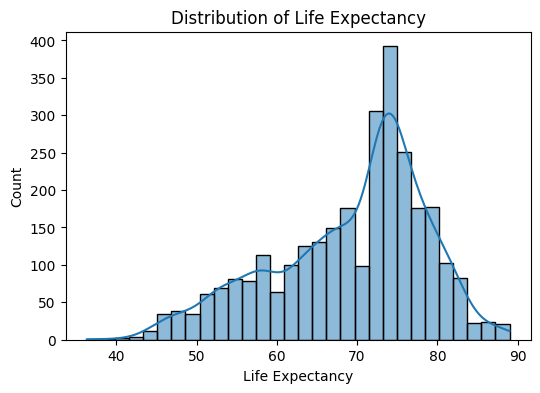

In [40]:

plt.figure(figsize=(6,4))
sns.histplot(df['Life expectancy'].dropna(), bins=30, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.show()


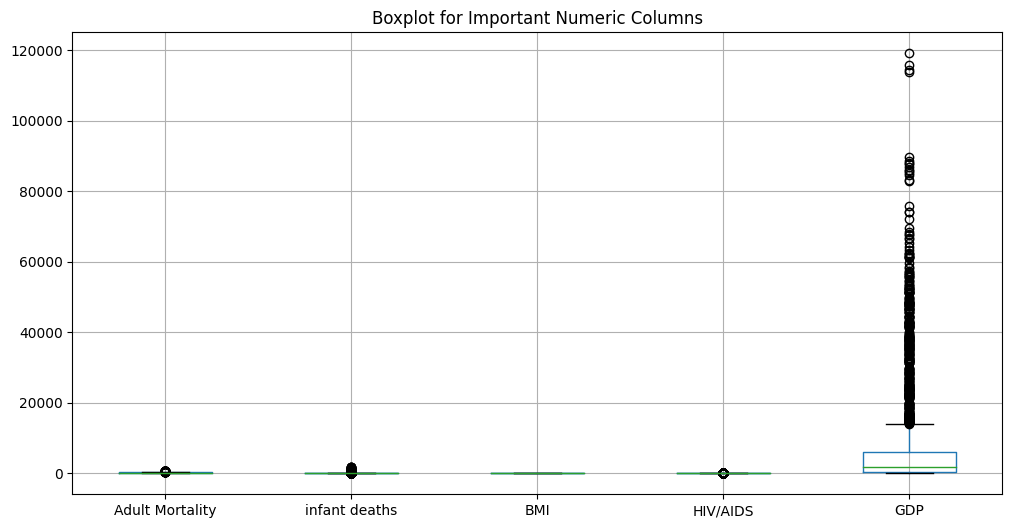

In [41]:
cols_to_check = ['Adult Mortality', 'infant deaths', 'BMI', 'HIV/AIDS', 'GDP']
plt.figure(figsize=(12,6))
df[cols_to_check].boxplot()
plt.title('Boxplot for Important Numeric Columns')
plt.show()

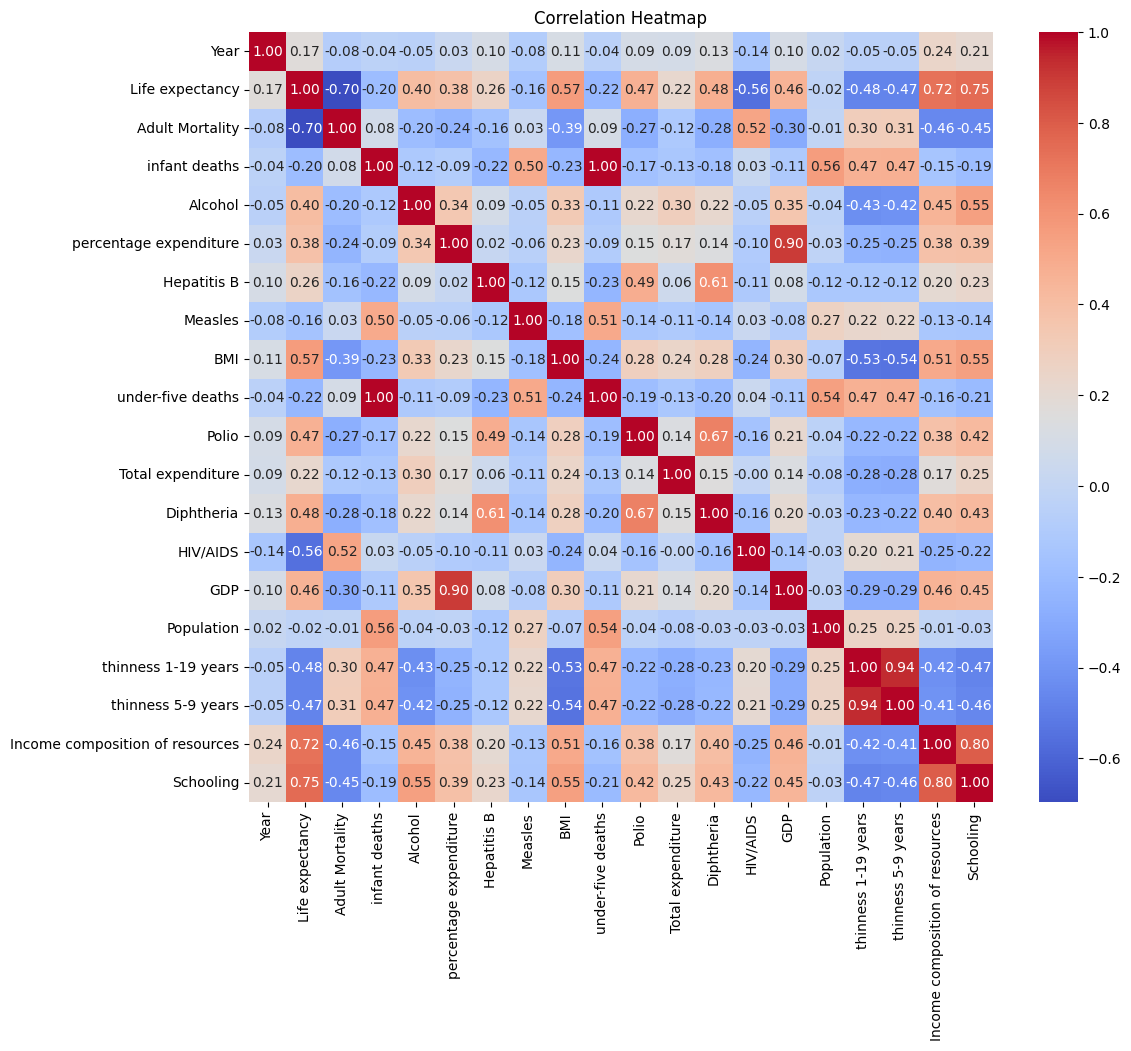

In [42]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12,10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Data Preprocessing

In [43]:
#missing values
df = df.dropna(subset=['Life expectancy'])



In [44]:
# filling missing values with median of the column

median_cols = ['Adult Mortality', 'Alcohol', 'BMI', 'Polio', 'Total expenditure',
               'Diphtheria', 'Hepatitis B', 'GDP', 'thinness 1-19 years',
               'thinness 5-9 years', 'Income composition of resources', 'Schooling',
               'Population']


for col in median_cols:
    df[col] = df[col].fillna(df[col].median())


df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [45]:
#  handle categorical columns

df = df.drop('Country', axis=1)

df['Status'] = df['Status'].map({'Developed':1, 'Developing':0})

In [46]:
print(df.columns)

      
df["Status"]

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


0       0
1       0
2       0
3       0
4       0
       ..
2933    0
2934    0
2935    0
2936    0
2937    0
Name: Status, Length: 2928, dtype: int64

In [47]:
#Outliers
#GDP = Gross Domestic Product
df["GDP"]

0       584.259210
1       612.696514
2       631.744976
3       669.959000
4        63.537231
           ...    
2933    454.366654
2934    453.351155
2935     57.348340
2936    548.587312
2937    547.358878
Name: GDP, Length: 2928, dtype: float64

In [48]:
# Using Log Transformation

df['GDP'] = np.log1p(df['GDP'])  
df["GDP"]

0       6.372055
1       6.419501
2       6.450067
3       6.508708
4       4.167242
          ...   
2933    6.121103
2934    6.118870
2935    4.066431
2936    6.309168
2937    6.306930
Name: GDP, Length: 2928, dtype: float64

In [49]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,6.372055,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,6.419501,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,6.450067,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,6.508708,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,4.167242,2978599.0,18.2,18.2,0.454,9.5


In [50]:
#Scaling

numeric_features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
                    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
                    'thinness 1-19 years', 'thinness 5-9 years',
                    'Income composition of resources', 'Schooling']

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])



In [51]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,0.790238,0.267520,-1.160542,-0.336102,-0.786715,-0.110924,-0.966625,...,-3.280973,0.940554,-0.735614,-0.324055,-0.637669,33736494.0,2.811294,2.771431,-0.735757,-0.588857
1,2014,0,59.9,0.854614,0.284455,-1.160542,-0.334975,-0.917501,-0.168570,-0.991809,...,-1.054149,0.948938,-0.862511,-0.324055,-0.610162,327582.0,2.879495,2.816006,-0.750362,-0.619589
2,2013,0,59.9,0.830473,0.301391,-1.160542,-0.335128,-0.830310,-0.173968,-1.016993,...,-0.882855,0.927978,-0.777913,-0.324055,-0.592441,31731688.0,2.924962,2.860582,-0.779573,-0.650322
3,2012,0,59.5,0.862660,0.326794,-1.160542,-0.332633,-0.699524,0.031273,-1.042177,...,-0.668737,1.091462,-0.651015,-0.324055,-0.558443,3696958.0,2.970429,2.927445,-0.813652,-0.681055
4,2011,0,59.2,0.886801,0.343730,-1.160542,-0.368345,-0.655928,0.050953,-1.062324,...,-0.625914,0.818989,-0.608716,-0.324055,-1.915922,2978599.0,3.038629,2.972020,-0.857467,-0.773253


In [52]:
#split the data

X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# LinearRegression Model


In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)
r2_lr = r2_score(y_test, y_pred)


print("Linear Regression Results:")
print("------------------------")
print("MSE:",mse_lr)
print("RMSE:", rmse_lr)
print("R² Score:", r2_lr)


Linear Regression Results:
------------------------
MSE: 15.516845611981621
RMSE: 3.9391427509017265
R² Score: 0.8206132621113774


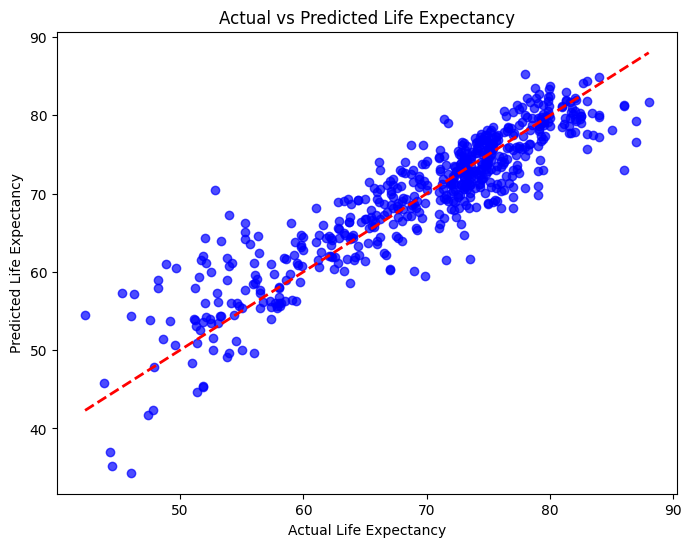

In [54]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.show()



# Decision Tree Regressor Model

In [55]:

dt_model = DecisionTreeRegressor(
    max_depth=10,        
    min_samples_split=5,   
    min_samples_leaf=5,   
    random_state=42)


dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print("------------------------")
print(f"RMSE = {rmse_dt}")
print(f"MSE  = {mse_dt}")
print(f"R² Score = {r2_dt}")


Decision Tree Results:
------------------------
RMSE = 2.3817007469011564
MSE  = 5.6724984477895255
R² Score = 0.9344215301438907


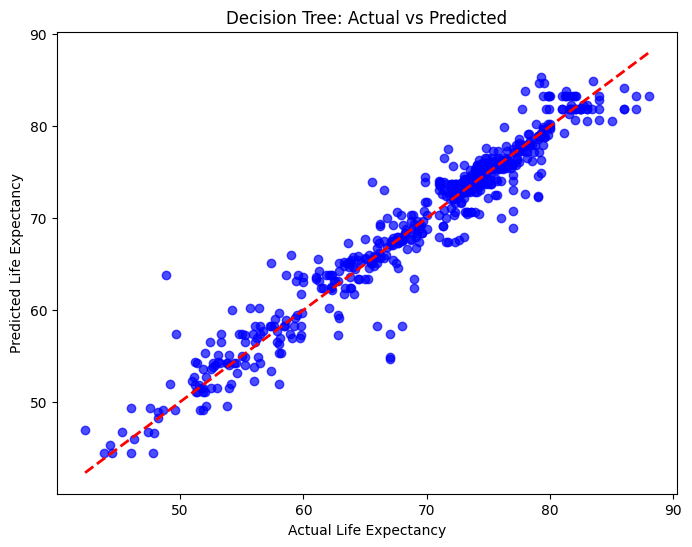

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


# Random Forest Regressor Model

In [57]:

rf_model = RandomForestRegressor(
    n_estimators=300,        
    max_depth=20,         
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42)


rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("------------------------")
print(f"RMSE = {rmse_rf}")
print(f"MSE  = {mse_rf}")
print(f"R² Score = {r2_rf}")


Random Forest Results:
------------------------
RMSE = 1.6851140030218952
MSE  = 2.839609203180476
R² Score = 0.9671719211123863


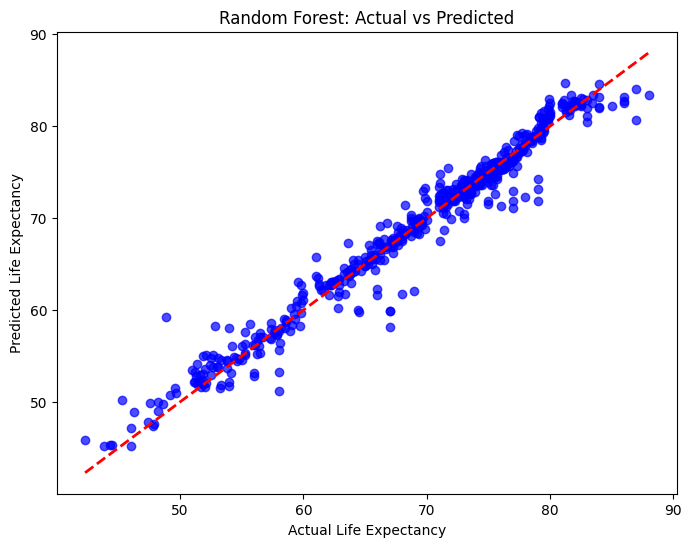

In [58]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Random Forest: Actual vs Predicted")
plt.show()



#  

#  XGBoost Regressor Model

In [59]:

xgb_model = XGBRegressor(
    n_estimators=500,        
    learning_rate=0.05,      
    max_depth=5,             
    subsample=0.8,             
    colsample_bytree=0.8,    
    random_state=42,
    objective='reg:squarederror')


xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print("------------------------")
print(f"RMSE = {rmse_xgb}")
print(f"MSE  = {mse_xgb}")
print(f"R² Score = {r2_xgb}")


XGBoost Results:
------------------------
RMSE = 1.6317569170404707
MSE  = 2.6626306363094217
R² Score = 0.969217930242147


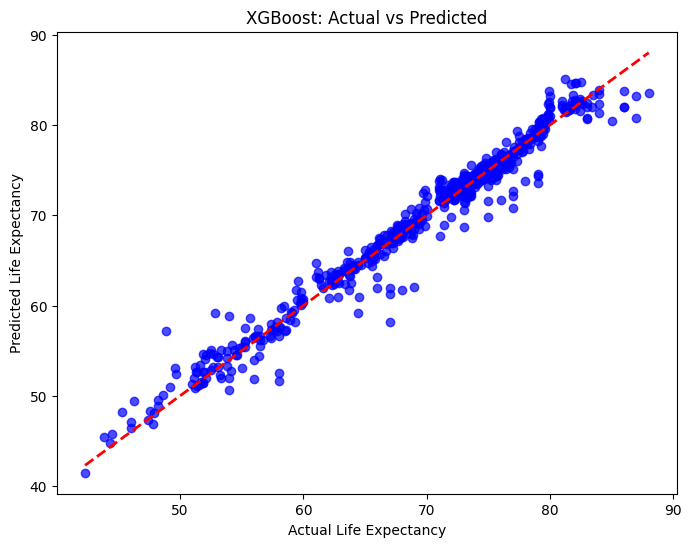

In [60]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("XGBoost: Actual vs Predicted")
plt.show()


#  Comparison Between Models


In [61]:

comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf, rmse_xgb],
    "MSE":  [mse_lr, mse_dt, mse_rf, mse_xgb],
    "R² Score": [r2_lr, r2_dt, r2_rf, r2_xgb]
})

comparison_df


,Model,RMSE,MSE,R² Score
0,Linear Regression,3.939143,15.516846,0.820613
1,Decision Tree,2.381701,5.672498,0.934422
2,Random Forest,1.685114,2.839609,0.967172
3,XGBoost,1.631757,2.662631,0.969218


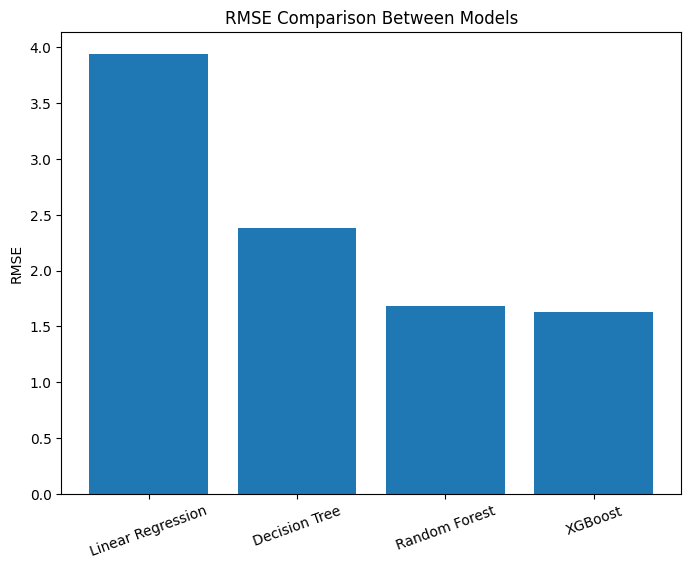

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(comparison_df["Model"], comparison_df["RMSE"])
plt.ylabel("RMSE")
plt.title("RMSE Comparison Between Models")
plt.xticks(rotation=20)
plt.show()


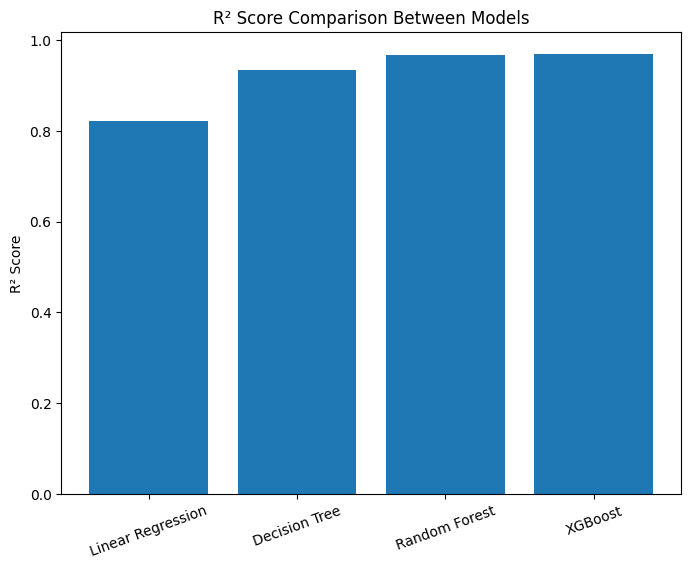

In [63]:
plt.figure(figsize=(8,6))
plt.bar(comparison_df["Model"], comparison_df["R² Score"])
plt.ylabel("R² Score")
plt.title("R² Score Comparison Between Models")
plt.xticks(rotation=20)
plt.show()


# Conclusion
****The XGBoost Regressor is the best model for predicting life expectancy in this dataset.****
